<a href="https://colab.research.google.com/github/PalakAggarwal13/PyTorch-DeepLearning/blob/main/PyTorch_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import torch
print(torch.__version__)

2.6.0+cu124


In [179]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [180]:
t1.dtype

torch.float32

In [181]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [182]:
t2.dtype

torch.float32

In [183]:
t3 = torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [184]:
t3.dtype

torch.float32

In [185]:
t4 = torch.tensor([
    [[11.,12,13],
     [14,15,16]],
    [[17,18,19],
     [20,21,22]]
])
t4

tensor([[[11., 12., 13.],
         [14., 15., 16.]],

        [[17., 18., 19.],
         [20., 21., 22.]]])

In [186]:
t4.dtype

torch.float32

In [187]:
t1.shape

torch.Size([])

In [188]:
t2.shape

torch.Size([4])

In [189]:
t3.shape

torch.Size([3, 3])

In [190]:
t4.shape

torch.Size([2, 2, 3])

In [191]:
x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5. , requires_grad = True)

In [192]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [193]:
y.backward()

In [194]:
print("dy/dx:" , x.grad)
print("dy/dw:" , w.grad)
print("dy/db:" , b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [195]:
import numpy as np

x = np.array([[1.,2,3],[4,5,6]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [196]:
y = torch.from_numpy(x)            #or you can do torch.tensor(x)
y

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [197]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [198]:
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

In [199]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [200]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [201]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [202]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.6798, -1.9868, -1.9840],
        [-1.6342, -0.7752,  0.6612]], requires_grad=True)
tensor([-0.6416,  0.3822], requires_grad=True)


In [203]:
def model(x):
  return x @ w.t() + b

In [204]:
preds = model(inputs)
preds

tensor([[-169.4415, -142.4167],
        [-240.5911, -174.2248],
        [-322.8015, -207.3128],
        [ -90.1380, -175.1718],
        [-283.3462, -140.5065]], grad_fn=<AddBackward0>)

In [205]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [206]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff * diff) / diff.numel()

In [207]:
loss = mse(preds , targets)
print(loss)  # full tensor

tensor(86031.4531, grad_fn=<DivBackward0>)


In [208]:
loss.backward()

In [209]:
print("dl/dw : " , w.grad)
print("dl/db : " , b.grad)

dl/dw :  tensor([[-24450.9453, -28903.4355, -17418.7305],
        [-21941.3145, -23617.9277, -14500.4521]])
dl/db :  tensor([-297.4637, -259.9265])


In [210]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# **GRADIENT DESCENT**

In [211]:
import torch

inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

lr = 1e-5

def mse(preds,targets):
  return torch.mean((preds-targets)**2)

for epoch in range(100):

  preds = inputs @ w.t() + b
  loss  = mse(preds,targets)

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

  if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f} ,  w =\n{w} , b = {b}")

Epoch 0: Loss = 52862.5547 ,  w =
tensor([[ 0.1876, -1.0528,  0.1517],
        [ 0.2527, -1.1622, -0.6431]], requires_grad=True) , b = tensor([-0.4160,  0.2146], requires_grad=True)
Epoch 10: Loss = 2786.0774 ,  w =
tensor([[ 0.7101, -0.3362,  0.5587],
        [ 1.0214, -0.1738, -0.0609]], requires_grad=True) , b = tensor([-0.4094,  0.2241], requires_grad=True)
Epoch 20: Loss = 1611.4875 ,  w =
tensor([[ 0.7189, -0.1810,  0.6213],
        [ 1.0594,  0.0196,  0.0329]], requires_grad=True) , b = tensor([-0.4090,  0.2250], requires_grad=True)
Epoch 30: Loss = 1406.0627 ,  w =
tensor([[ 0.6603, -0.1073,  0.6357],
        [ 1.0001,  0.0990,  0.0583]], requires_grad=True) , b = tensor([-0.4094,  0.2247], requires_grad=True)
Epoch 40: Loss = 1241.1062 ,  w =
tensor([[ 0.5960, -0.0480,  0.6430],
        [ 0.9311,  0.1592,  0.0738]], requires_grad=True) , b = tensor([-0.4098,  0.2242], requires_grad=True)
Epoch 50: Loss = 1096.0874 ,  w =
tensor([[0.5344, 0.0062, 0.6490],
        [0.8645, 0.213

# **Linear regression using PyTorch built-ins**

In [212]:
import torch.nn as nn

In [213]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64],
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133],
                    [22, 37], [103, 119], [56, 70],
                    [81, 101], [119, 133], [22, 37],
                    [103, 119], [56, 70], [81, 101],
                    [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [214]:
from torch.utils.data import TensorDataset

In [215]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [216]:
from torch.utils.data import DataLoader

In [217]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [218]:
i=0
for xb,yb in train_dl:
  print(f"batch:{i} ")
  print(xb)
  print(yb)
  i +=1

batch:0 
tensor([[ 87., 134.,  58.],
        [ 87., 134.,  58.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.]])
tensor([[119., 133.],
        [119., 133.],
        [103., 119.],
        [ 81., 101.],
        [ 56.,  70.]])
batch:1 
tensor([[102.,  43.,  37.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [103., 119.]])
batch:2 
tensor([[ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 91.,  88.,  64.]])
tensor([[119., 133.],
        [ 56.,  70.],
        [ 22.,  37.],
        [ 81., 101.],
        [ 81., 101.]])


In [219]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1359,  0.1007,  0.1313],
        [ 0.0321, -0.2049,  0.3052]], requires_grad=True)
Parameter containing:
tensor([0.0492, 0.3816], requires_grad=True)


In [220]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1359,  0.1007,  0.1313],
         [ 0.0321, -0.2049,  0.3052]], requires_grad=True),
 Parameter containing:
 tensor([0.0492, 0.3816], requires_grad=True)]

In [221]:
import torch.nn.functional as F

In [222]:
loss_fn = F.mse_loss

In [223]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(7756.8569, grad_fn=<MseLossBackward0>)


In [224]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [225]:
def fit(num_epochs,model,loss_fn,opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [226]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 530.1581
Epoch [20/100], Loss: 220.8872
Epoch [30/100], Loss: 267.9843
Epoch [40/100], Loss: 90.0299
Epoch [50/100], Loss: 88.7055
Epoch [60/100], Loss: 39.9113
Epoch [70/100], Loss: 48.2584
Epoch [80/100], Loss: 26.4582
Epoch [90/100], Loss: 18.5501
Epoch [100/100], Loss: 15.2124


In [227]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.1704,  71.5841],
        [ 81.2999, 100.0589],
        [119.0004, 132.0221],
        [ 26.8268,  44.1268],
        [ 97.0098, 114.0200],
        [ 58.1704,  71.5841],
        [ 81.2999, 100.0589],
        [119.0004, 132.0221],
        [ 26.8268,  44.1268],
        [ 97.0098, 114.0200],
        [ 58.1704,  71.5841],
        [ 81.2999, 100.0589],
        [119.0004, 132.0221],
        [ 26.8268,  44.1268],
        [ 97.0098, 114.0200]], grad_fn=<AddmmBackward0>)

In [228]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# **Working with Images & Logistic Regression in PyTorch**

In [229]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [230]:
dataset = MNIST(root='data/',download=True)

In [231]:
len(dataset)

60000

In [232]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [233]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


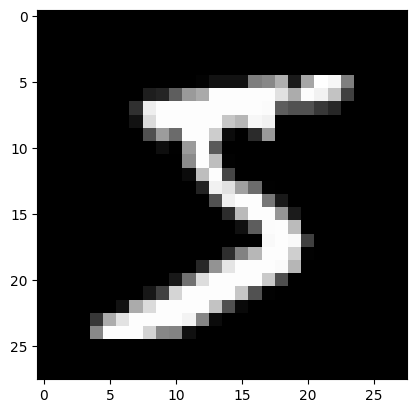

In [235]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:" ,label)

Label: 3


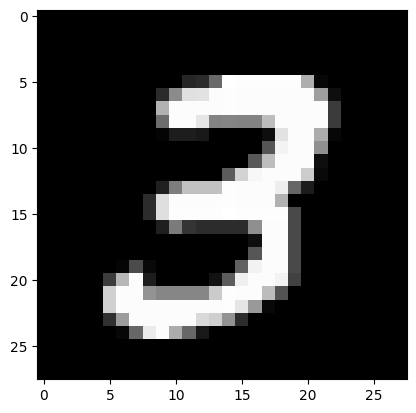

In [236]:
image , label = dataset[7]
plt.imshow(image , cmap='gray')
print("Label:" , label)

In [237]:
import torchvision.transforms as transforms

In [238]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [239]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [240]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


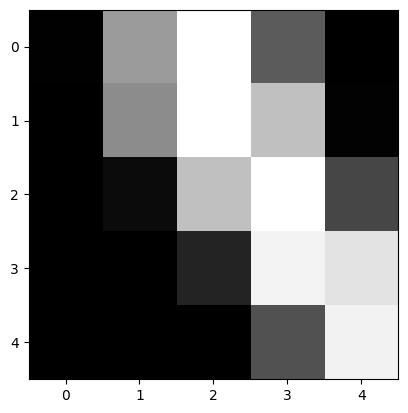

In [241]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [242]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [243]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [244]:
import numpy as np

def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [245]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [246]:
print(len(train_indices)) , print(len(val_indices))
print("sample val_indices : ", val_indices[:20])

48000
12000
sample val_indices :  [11258 18565 26358 34945 26976 24959 13130 59325 16043 29297 35625 47586
 51586 41991 20116 41066 13810 26135 52055  9385]


In [247]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [248]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_indices)

In [249]:
print("xb.shape before flattening:", xb.shape)

xb.shape before flattening: torch.Size([5, 3])


In [250]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [251]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0173, -0.0169,  0.0169,  ..., -0.0068, -0.0317,  0.0260],
        [ 0.0088,  0.0017, -0.0302,  ..., -0.0294,  0.0007,  0.0025],
        [-0.0187, -0.0235,  0.0248,  ...,  0.0140,  0.0313,  0.0132],
        ...,
        [ 0.0273,  0.0188, -0.0185,  ...,  0.0170,  0.0255,  0.0006],
        [-0.0297,  0.0026,  0.0145,  ...,  0.0082, -0.0074,  0.0038],
        [-0.0203, -0.0072,  0.0353,  ...,  0.0316,  0.0098,  0.0269]],
       requires_grad=True)


In [252]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0065, -0.0215,  0.0279, -0.0052,  0.0277, -0.0260, -0.0252, -0.0223,
         0.0249, -0.0050], requires_grad=True)


In [253]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        return self.linear(xb)

model = MnistModel()

In [254]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784])
torch.Size([10])


[Parameter containing:
 tensor([[ 0.0057,  0.0260,  0.0303,  ..., -0.0207, -0.0271, -0.0313],
         [-0.0338,  0.0180, -0.0258,  ...,  0.0033, -0.0164, -0.0337],
         [-0.0084,  0.0167, -0.0055,  ..., -0.0277, -0.0034,  0.0338],
         ...,
         [-0.0284, -0.0321,  0.0235,  ...,  0.0076,  0.0206, -0.0158],
         [ 0.0216,  0.0142, -0.0122,  ..., -0.0092,  0.0124,  0.0231],
         [-0.0083, -0.0214,  0.0037,  ..., -0.0050, -0.0062,  0.0162]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0311,  0.0237, -0.0350,  0.0132, -0.0162,  0.0116,  0.0135, -0.0335,
         -0.0330, -0.0143], requires_grad=True)]

In [255]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.1474, -0.0839, -0.1734, -0.1581, -0.0908, -0.2563, -0.1897, -0.3829,
         -0.6039, -0.0878],
        [-0.2323,  0.0166, -0.2171, -0.0975, -0.0759, -0.4013, -0.1918, -0.1088,
         -0.2201,  0.1086]])


In [256]:
probs = F.softmax(outputs,dim=1)
print(probs[:2].data)
print("Sum : " , torch.sum(probs[0]).item())

tensor([[0.1061, 0.1130, 0.1033, 0.1049, 0.1122, 0.0951, 0.1017, 0.0838, 0.0672,
         0.1126],
        [0.0905, 0.1161, 0.0919, 0.1036, 0.1058, 0.0764, 0.0943, 0.1024, 0.0916,
         0.1273]])
Sum :  0.9999999403953552


In [257]:
max_probs , preds = torch.max(probs , dim=1)
print(preds)
print(max_probs)

tensor([1, 9, 3, 3, 4, 4, 1, 1, 3, 8, 9, 3, 6, 1, 4, 1, 3, 3, 3, 6, 8, 4, 6, 3,
        1, 3, 7, 3, 1, 3, 4, 1, 3, 1, 3, 9, 8, 9, 3, 3, 9, 1, 9, 9, 4, 4, 3, 6,
        3, 6, 9, 4, 5, 9, 3, 3, 4, 3, 4, 8, 1, 1, 1, 1, 1, 1, 4, 4, 5, 4, 9, 9,
        1, 1, 3, 9, 9, 5, 1, 1, 6, 9, 9, 9, 7, 9, 9, 3, 9, 9, 9, 1, 3, 3, 9, 1,
        9, 4, 3, 9])
tensor([0.1130, 0.1273, 0.1487, 0.1404, 0.1143, 0.1167, 0.1269, 0.1170, 0.1192,
        0.1244, 0.1381, 0.1340, 0.1207, 0.1374, 0.1217, 0.1435, 0.1255, 0.1303,
        0.1288, 0.1370, 0.1160, 0.1395, 0.1231, 0.1427, 0.1267, 0.1213, 0.1216,
        0.1275, 0.1180, 0.1357, 0.1436, 0.1220, 0.1193, 0.1517, 0.1276, 0.1481,
        0.1236, 0.1362, 0.1703, 0.1217, 0.1287, 0.1200, 0.1404, 0.1362, 0.1130,
        0.1361, 0.1333, 0.1226, 0.1150, 0.1141, 0.1203, 0.1335, 0.1374, 0.1205,
        0.1290, 0.1529, 0.1369, 0.1161, 0.1321, 0.1411, 0.1367, 0.1310, 0.1281,
        0.1317, 0.1393, 0.1286, 0.1587, 0.1434, 0.1214, 0.1252, 0.1265, 0.1276,
        0.1132, 0.1

In [258]:
labels

tensor([8, 9, 4, 4, 0, 2, 0, 4, 7, 2, 2, 8, 1, 8, 4, 6, 9, 7, 1, 8, 7, 8, 1, 6,
        7, 9, 8, 6, 7, 0, 4, 1, 4, 7, 4, 6, 7, 0, 2, 7, 2, 9, 2, 9, 8, 3, 8, 9,
        1, 9, 5, 8, 6, 2, 7, 0, 8, 4, 4, 7, 9, 5, 1, 1, 1, 1, 8, 5, 7, 6, 9, 1,
        1, 0, 9, 3, 3, 0, 8, 5, 1, 1, 3, 2, 7, 6, 6, 1, 0, 1, 9, 7, 4, 6, 3, 3,
        3, 4, 4, 5])

In [259]:
def accuracy(outputs , labels):
  max_probs , preds = torch.max(probs,dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [260]:
accuracy(preds,labels)

tensor(0.1500)

In [261]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs,preds)
print(loss)

tensor(2.0429, grad_fn=<NllLossBackward0>)


In [262]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr)

In [263]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric = None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item(),len(xb),metric_results

In [264]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric)for xb, yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [265]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [266]:
val_loss , total , val_accuracy = evaluate(model , loss_fn , val_loader , metric = accuracy)
print('Loss:{:.4f},Accuracy:{:.4f}'.format(val_loss,val_accuracy))

Loss:2.3153,Accuracy:0.1086


In [267]:
def fit(epochs , model , loss_fn , opt , train_dl , val_dl , metric=None):
  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss = loss_batch(model,loss_fn,xb,yb,opt)
      result = evaluate(model , loss_fn , val_dl , metric)
      val_loss , total , val_metrics = result

      if metric is None:
        print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
      else:
        print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

In [268]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters() , lr=0.001)

In [269]:
# fit(5 , model , F.cross_entropy ,optimizer,train_loader,val_loader,accuracy)

In [270]:
test_dataset= MNIST(root='data/',train=False,transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


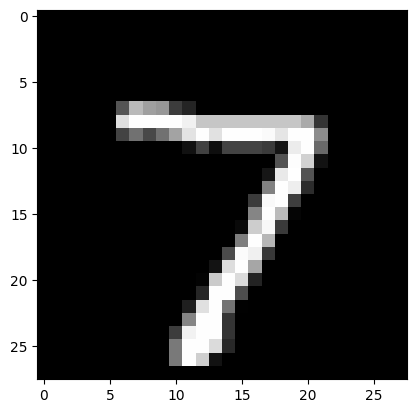

In [271]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [272]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 3


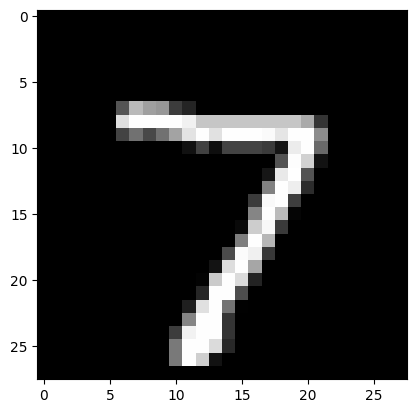

In [273]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 3


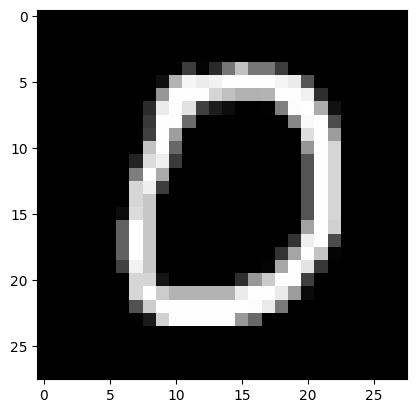

In [274]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 3


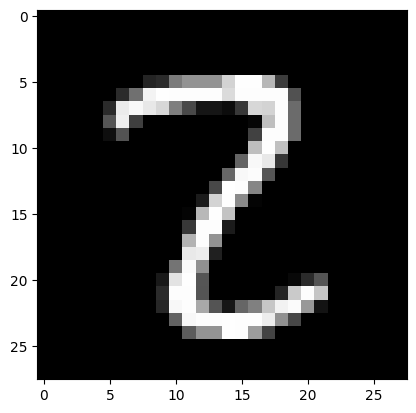

In [275]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [276]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model,F.cross_entropy, test_loader,metric=accuracy)
result

(np.float64(2.285158803939819), np.int64(10000), np.float64(0.1589))

In [277]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0185, -0.0064, -0.0275,  ..., -0.0058,  0.0284,  0.0186],
                      [ 0.0010, -0.0036,  0.0297,  ..., -0.0344,  0.0242,  0.0170],
                      [-0.0086,  0.0016, -0.0248,  ..., -0.0180,  0.0041,  0.0232],
                      ...,
                      [-0.0291, -0.0072, -0.0269,  ..., -0.0010,  0.0199, -0.0160],
                      [-0.0278, -0.0227, -0.0021,  ..., -0.0103, -0.0149, -0.0291],
                      [ 0.0155,  0.0024, -0.0256,  ...,  0.0110, -0.0258,  0.0262]])),
             ('linear.bias',
              tensor([-0.0214,  0.0032,  0.0176, -0.0096,  0.0303,  0.0219, -0.0067, -0.0056,
                       0.0026, -0.0272]))])

In [278]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0185, -0.0064, -0.0275,  ..., -0.0058,  0.0284,  0.0186],
                      [ 0.0010, -0.0036,  0.0297,  ..., -0.0344,  0.0242,  0.0170],
                      [-0.0086,  0.0016, -0.0248,  ..., -0.0180,  0.0041,  0.0232],
                      ...,
                      [-0.0291, -0.0072, -0.0269,  ..., -0.0010,  0.0199, -0.0160],
                      [-0.0278, -0.0227, -0.0021,  ..., -0.0103, -0.0149, -0.0291],
                      [ 0.0155,  0.0024, -0.0256,  ...,  0.0110, -0.0258,  0.0262]])),
             ('linear.bias',
              tensor([-0.0214,  0.0032,  0.0176, -0.0096,  0.0303,  0.0219, -0.0067, -0.0056,
                       0.0026, -0.0272]))])

In [279]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, F.cross_entropy,test_loader, metric=accuracy)
result

(np.float64(2.285158803939819), np.int64(10000), np.float64(0.1589))

# **TRAINING DEEP NEURAL NETWORK USING GPU**

In [280]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [281]:
dataset = MNIST(root='data/' , download=True,transform = transforms.ToTensor())

In [282]:
len(dataset)

60000

torch.Size([1, 28, 28])
5


(None, None)

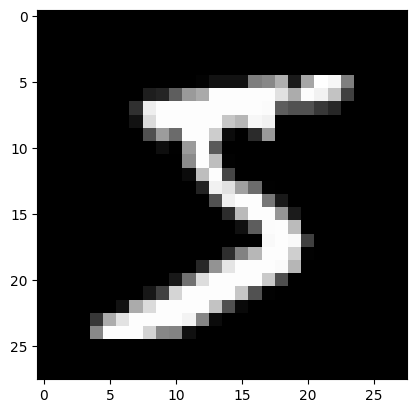

In [283]:
img , label = dataset[0]
plt.imshow(img[0] , cmap='gray')
print(img.shape) , print(label)

In [284]:
def split_indices(n,val_pct):
  n_val = int(n*val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [285]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)
print(len(train_indices)) , print(len(val_indices))

48000
12000


(None, None)

In [286]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset , batch_size=batch_size , sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset , batch_size=batch_size , sampler = val_sampler)

In [287]:
for images, labels in train_loader:
    print(images.shape)  # torch.Size([100, 1, 28, 28])
    images_flat = images.view(images.size(0), -1)
    print(images_flat.shape)  # torch.Size([100, 784])
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [288]:
import torch.nn as nn
import torch.nn.functional as F

In [289]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
      super().__init__()
      self.linear1 = nn.Linear(in_size,hidden_size)
      self.linear2 = nn.Linear(hidden_size,out_size)

    def forward(self,xb):
      xb = xb.view(xb.size(0),-1)
      out = self.linear1(xb)
      out = F.relu(out)
      out = self.linear2(out)
      return out

In [290]:
input_size = 28*28
num_classes = 10

model = MnistModel(in_size=input_size,hidden_size=32,out_size=10)

In [291]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [292]:
for images , labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs,labels)
  print('Loss:',loss.item())
  break

print(outputs.shape)
print(outputs[:2])

Loss: 2.3226468563079834
torch.Size([100, 10])
tensor([[ 0.0980,  0.1552, -0.1393,  0.0902, -0.0743,  0.0671,  0.0359,  0.1079,
          0.0610, -0.0030],
        [ 0.1717,  0.1968, -0.1396,  0.0532, -0.1406,  0.0315,  0.0306,  0.1334,
          0.1015,  0.0429]], grad_fn=<SliceBackward0>)


In [293]:
torch.cuda.is_available()

False

In [294]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [295]:
device = get_default_device()
device

device(type='cpu')

In [296]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

In [297]:
for images , labels in train_loader:
  print(images.shape)
  images = to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cpu


In [298]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [299]:
train_dl = DeviceDataLoader(train_loader,device)
val_dl = DeviceDataLoader(val_loader,device)

In [300]:
for xb , yb in train_dl:
  print(xb.device)
  print(yb)
  break

cpu
tensor([2, 3, 8, 7, 0, 8, 0, 3, 1, 0, 7, 1, 5, 2, 6, 5, 9, 0, 7, 2, 0, 3, 9, 2,
        6, 3, 1, 4, 6, 2, 3, 8, 4, 7, 0, 8, 7, 1, 9, 8, 6, 0, 1, 0, 3, 8, 8, 8,
        7, 1, 7, 6, 2, 8, 6, 4, 3, 3, 7, 4, 6, 3, 0, 8, 3, 9, 2, 1, 7, 1, 0, 4,
        0, 5, 6, 8, 3, 5, 0, 1, 8, 5, 4, 3, 1, 2, 1, 9, 4, 1, 6, 9, 1, 5, 4, 8,
        3, 9, 6, 2])


In [301]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item() , len(xb) , metric_results

In [302]:
def evaluate(model , loss_fn , val_dl , metric=None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric) for xb , yb in val_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [303]:
def fit(epochs , lr , model , loss_fn , train_dl , val_dl , opt = None , metric=None):
  losses , metrics = [] , []
  if opt is None:
    opt = torch.optim.SGD(model.parameters() , lr=lr)

  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss,_,_ = loss_batch(model , loss_fn , xb , yb , opt)

    result = evaluate(model , loss_fn , val_dl , metric)
    val_loss , total , val_metrics = result
    losses.append(loss)
    metrics.append(val_metrics)

    if metric is None:
      print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
    else:
      print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

  return losses , metrics

In [304]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [305]:
model = MnistModel(input_size , hidden_size = 32 , out_size = num_classes)
to_device(model , device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [306]:
val_loss , total , val_accuracy = evaluate(model , F.cross_entropy , val_dl , metric = accuracy)
print('Loss: {:.4f} , Accuracy : {:.4f}'.format(val_loss , val_accuracy))

Loss: 2.3091 , Accuracy : 0.0548


In [307]:
losses1 , metrics1 = fit(5 , 0.5 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/5] , loss = 0.2341 , accuracy : 0.9313
Epoch [2/5] , loss = 0.1775 , accuracy : 0.9475
Epoch [3/5] , loss = 0.1535 , accuracy : 0.9550
Epoch [4/5] , loss = 0.1742 , accuracy : 0.9490
Epoch [5/5] , loss = 0.1433 , accuracy : 0.9579


In [308]:
losses2 , metrics2 = fit(10 , 0.1 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/10] , loss = 0.1284 , accuracy : 0.9631
Epoch [2/10] , loss = 0.1278 , accuracy : 0.9635
Epoch [3/10] , loss = 0.1249 , accuracy : 0.9643
Epoch [4/10] , loss = 0.1267 , accuracy : 0.9644
Epoch [5/10] , loss = 0.1236 , accuracy : 0.9644
Epoch [6/10] , loss = 0.1234 , accuracy : 0.9643
Epoch [7/10] , loss = 0.1234 , accuracy : 0.9649
Epoch [8/10] , loss = 0.1223 , accuracy : 0.9651
Epoch [9/10] , loss = 0.1239 , accuracy : 0.9639
Epoch [10/10] , loss = 0.1224 , accuracy : 0.9648


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

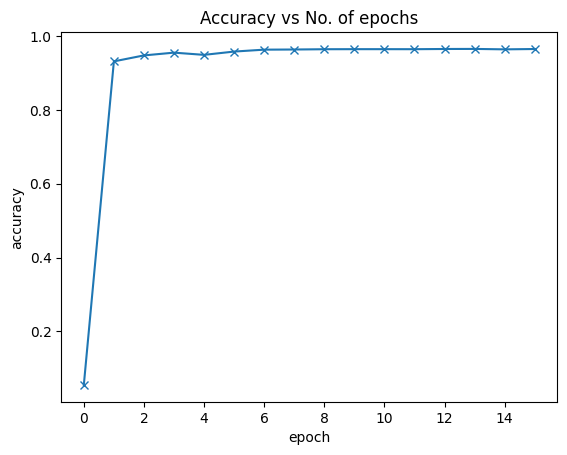

In [309]:
accuracies = [val_accuracy] + metrics1 + metrics2
plt.plot(accuracies , '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

# **IMAGE CLASSIFICATION USING CONVOLUTION NEURAL NETWORKS (CNNs)**

In [310]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

In [311]:
# dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
# download_url(dataset_url, '.')
# with tarfile.open('./cifar-10-python.tar.gz' , 'r:gz') as tar:
#   tar.extractall(path='./data')

In [312]:
# data_dir = './data/cifar-10-batches-py'

# print(os.listdir(data_dir))
# classes = os.listdir(data_dir + "/train")
# print(classes)

In [313]:
simple_model = nn.Sequential(
    nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [314]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = simple_model(images)
  print('out.shape:',out.shape)
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 8, 14, 14])


In [315]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
)

In [316]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(16 * 7 * 7, 10),
)

In [317]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = model(images)
  print('out.shape:',out.shape)
  print('out[0]:',out[0])
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 10])
out[0]: tensor([ 0.0143,  0.0295, -0.0428,  0.0398, -0.0522, -0.0652,  0.0934, -0.1816,
         0.0403,  0.0218], grad_fn=<SelectBackward0>)


In [318]:
probs = F.softmax(out[0], dim=0)

torch.sum(probs) , probs
torch.max(probs)

tensor(0.1106, grad_fn=<MaxBackward1>)

In [319]:
def get_default_device():
  if torch.cuda.is_available():
    print('GPU')
  else:
    print('CPU')

def to_device(data , device):
  if isinstance(data , (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device , non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [320]:
device = get_default_device()
device

CPU


In [321]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(val_dl , device)
to_device(model , device)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=10, bias=True)
)